# 疫情趋势-全球数据

In [1]:
import numpy as np
import pandas as pd

# 导入matplotlib库中的额pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
# 让图表直接在Jupyter notebook中展示出来
%matplotlib inline

# 一个cell输出多行语句
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pyecharts
from pyecharts.charts import Bar
from pyecharts import options as opts
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          # 解决负号无法正常显示的问题
          'axes.unicode_minus': False,
          # 解决中文乱码问题
          'font.sans-serif': ['SimHei']}
plt.rcParams.update(params)
# 默认设置下matplotlib做出来的图标不是很清晰，可以将图表设置成矢量格式显示
%config InlineBackend.figure_format = 'svg'

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.1.1
0.9.0


//anaconda3/lib/python3.7/site-packages/pyecharts/render/engine.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


,provinceName,currentConfirmedCount,confirmedCount,confirmedCountRank,suspectedCount,curedCount,deadCount,deadCountRank,deadRate,deadRateRank,...,countryName,provinceShortName,continentEnglishName,countryEnglishName,provinceEnglishName,updateTime,cities,createTime,modifyTime,cityName
10,美国,629465.0,734969,1.0,0.0,66601,38903,1.0,5.29,28.0,...,美国,美国,North America,United States of America,United States of America,2020-04-19 11:23:43.781,NaN,NaN,NaN,NaN
112,美国,629460.0,734964,1.0,0.0,66601,38903,1.0,5.29,28.0,...,美国,美国,North America,United States of America,United States of America,2020-04-19 11:18:40.090,NaN,NaN,NaN,NaN
115,美国,628693.0,732197,1.0,0.0,64840,38664,1.0,5.28,28.0,...,美国,美国,North America,United States of America,United States of America,2020-04-19 10:01:23.092,NaN,NaN,NaN,NaN
422,美国,628693.0,732197,1.0,0.0,64840,38664,1.0,5.28,28.0,...,美国,美国,North America,United States of America,United States of America,2020-04-19 07:39:54.514,NaN,NaN,NaN,NaN
616,美国,610076.0,706832,1.0,0.0,59672,37084,1.0,5.24,27.0,...,美国,美国,North America,United States of America,United States of America,2020-04-18 23:11:26.641,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '美国')

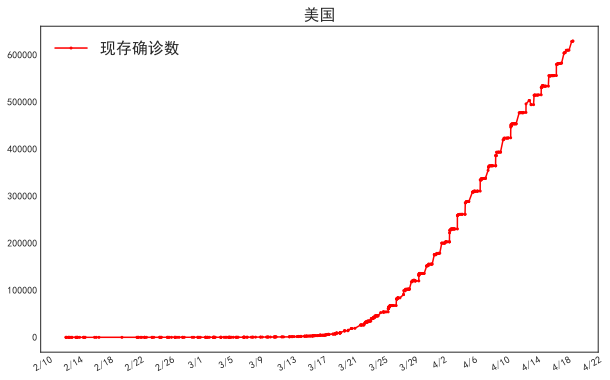

In [75]:
# 准备数据
df = pd.read_json('data/json/DXYArea-TimeSeries.json')
# 过滤
df = df[df['countryName'] == '美国']
# 排序
df.sort_values(by='updateTime', ascending=False, inplace=True)
# origin=pd.Timestamp('1970-01-01 08:00:00')转换为东八区
df['updateTime'] = pd.to_datetime(df['updateTime'], unit='ms', origin=pd.Timestamp('1970-01-01 08:00:00'))
df.head()

# 绘图
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(df['updateTime'], df['currentConfirmedCount'], color='r', marker='o', markersize=2, label='现存确诊数')
ax.legend(loc='best')
ax.set_title('美国')
# 设置刻度大小
ax.tick_params(labelsize=10)
# 设置刻度旋转
ax.tick_params(axis='x', rotation=30)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

# 添加数据标签
# for a, b in zip(df['updateTime'], df['currentConfirmedCount']):
#     plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

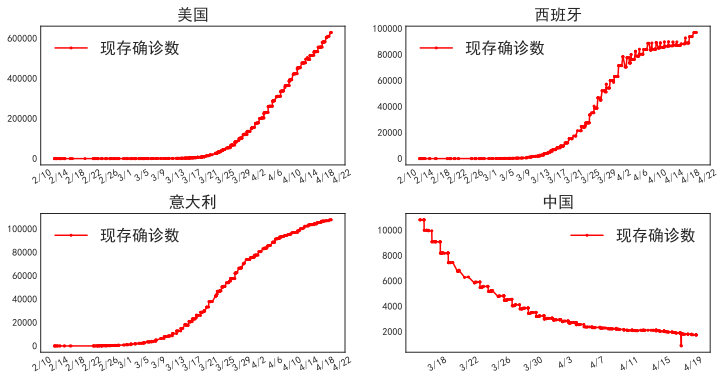

In [95]:
# 准备数据
def country_trend(df, country_name, ax):
    # 过滤
    new_df = df[(df['countryName'] == country_name) & (df['countryName'] == df['provinceName'])].copy()
    # 排序
    new_df.sort_values(by='updateTime', ascending=False, inplace=True)
    # origin=pd.Timestamp('1970-01-01 08:00:00')转换为东八区
    new_df['updateTime'] = pd.to_datetime(new_df['updateTime'], unit='ms', origin=pd.Timestamp('1970-01-01 08:00:00'))

    # 绘图
    ax.plot(new_df['updateTime'], new_df['currentConfirmedCount'], color='r', marker='o', markersize=2, label='现存确诊数')
    ax.legend(loc='best')
    ax.set_title(country_name)
    # 设置刻度大小
    ax.tick_params(labelsize=10)
    # 设置刻度旋转
    ax.tick_params(axis='x', rotation=30)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))

df = pd.read_json('data/json/DXYArea-TimeSeries.json')
country_list = ['美国', '西班牙', '意大利', '中国']
fig, axes = plt.subplots(len(country_list)//2, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.35)
for i, country_name in enumerate(country_list):
    country_trend(df, country_name, axes[i//2, 0 if i%2 == 0 else 1])